In [150]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import re
from wordcloud import WordCloud, STOPWORDS 


In [3]:
import sqlite3 as sql


In [79]:
jerky_df = pd.read_csv(r"C:\Users\Nut sack\Downloads\jerky.csv")

In [81]:
jerky_df.head(3)

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,...,chewy,soft,tough,moist,dry,thick,thin,grade,cost,jerkyID.1
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,...,1,0,1,0,1,1,0,NaN,NaN,1
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,...,1,0,1,0,1,1,0,NaN,NaN,2
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,...,1,0,1,0,0,0,0,NaN,NaN,3


In [82]:
jerky_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 29 columns):
descriptionID             39 non-null int64
jerkyID                   39 non-null int64
manufactureDescription    39 non-null object
brand                     39 non-null object
flavor                    39 non-null object
smoked                    39 non-null int64
protein                   39 non-null int64
calories                  39 non-null int64
gluten free               39 non-null int64
exotic                    39 non-null int64
sweet                     39 non-null int64
hot                       39 non-null int64
sweetSpicy                39 non-null int64
teriyaki                  39 non-null int64
original                  39 non-null int64
Peppered                  39 non-null int64
koreanBBQ                 39 non-null int64
honeyGlazed               39 non-null int64
sodium                    39 non-null int64
chewy                     39 non-null int64
soft          

In [85]:
print(jerky_df['brand'].unique())
print(len(jerky_df['brand'].unique()))
print(jerky_df['flavor'].unique())
print(len(jerky_df['flavor'].unique()))


['Cattlemans Cut' 'Chefs Cut' 'Field Trip' 'Golden Island' 'Jacks links'
 'Jacks Links' 'Lauras Lean' 'Lorissas Kitchen' 'Old Trapper'
 'Three Jerks' 'Tillamook Country Smoker']
11
['Original' 'peppered' 'Teriyaki' 'Texas Style'
 'peppered chipolte cracked' 'Sweet and Spicy' 'Mandarin orange teriyaki'
 'original' 'Sweet and Spicy bbq' 'Chili lime spicy and tangy'
 'kung pao very spicy' 'Hickory Smoked' 'Sriracha' 'Steakhouse'
 'Sweet and Hot' 'teriyaki' 'korean bbq' 'szechuan peppercorn'
 'Hot and Spicy' 'Chipotle Adobo Sweet and Tangy'
 'Maple Bourbon Sweet and boozy' 'Memphis BBQ Spicy and Savory'
 'Teriyaki Gingery and Garlicky' 'Honey Glazed' 'original Old Fashioned'
 'Peppered']
26


In [86]:
jerky_df['norm_brand'] = [brand.lower() for brand in jerky_df['brand']]
jerky_df['norm_flav'] = [flavor.lower() for flavor in jerky_df['flavor']]
jerky_df['norm_desc'] = [manufactureDescription.lower() for manufactureDescription in jerky_df['manufactureDescription']]

In [87]:
data.head(2)

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,...,moist,dry,thick,thin,grade,cost,jerkyID.1,norm_brand,norm_flav,norm_desc
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,...,0,1,1,0,NaN,NaN,1,cattlemans cut,original,featuring only premium steak with a robust fla...
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,...,0,1,1,0,NaN,NaN,2,cattlemans cut,peppered,"when you start with slow-cooked premium steak,..."


In [89]:
print(jerky_df['norm_brand'].unique())
print(len(jerky_df['norm_brand'].unique()))
print(jerky_df['norm_flav'].unique())
print(len(jerky_df['norm_flav'].unique()))

['cattlemans cut' 'chefs cut' 'field trip' 'golden island' 'jacks links'
 'lauras lean' 'lorissas kitchen' 'old trapper' 'three jerks'
 'tillamook country smoker']
10
['original' 'peppered' 'teriyaki' 'texas style'
 'peppered chipolte cracked' 'sweet and spicy' 'mandarin orange teriyaki'
 'sweet and spicy bbq' 'chili lime spicy and tangy' 'kung pao very spicy'
 'hickory smoked' 'sriracha' 'steakhouse' 'sweet and hot' 'korean bbq'
 'szechuan peppercorn' 'hot and spicy' 'chipotle adobo sweet and tangy'
 'maple bourbon sweet and boozy' 'memphis bbq spicy and savory'
 'teriyaki gingery and garlicky' 'honey glazed' 'original old fashioned']
23


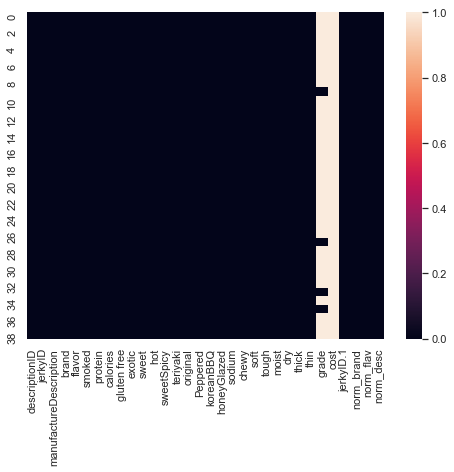

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(jerky_df.isnull(),cbar=True);

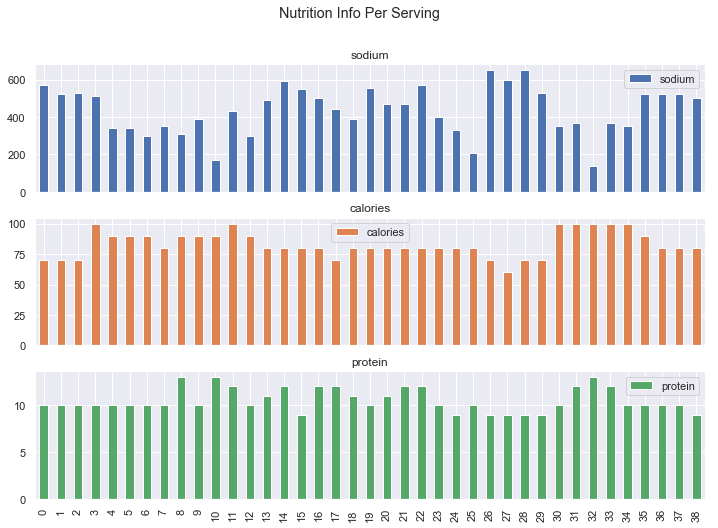

In [99]:
jerky_df[["sodium", "calories", "protein"]].plot.bar(label = 'Nutrition',figsize=(12,8)
                                                     ,subplots = True, title = 'Nutrition Info Per Serving')

#plt.savefig("PrVoCa.png")
plt.show()

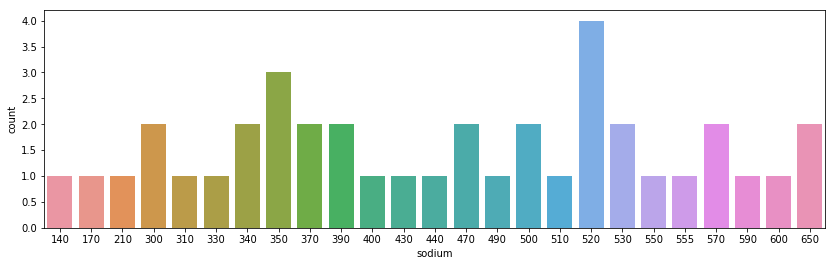

In [31]:
plt.figure(figsize=(14,4))
sns.countplot(x='sodium', data=data)#.set_title("Average User Rating")

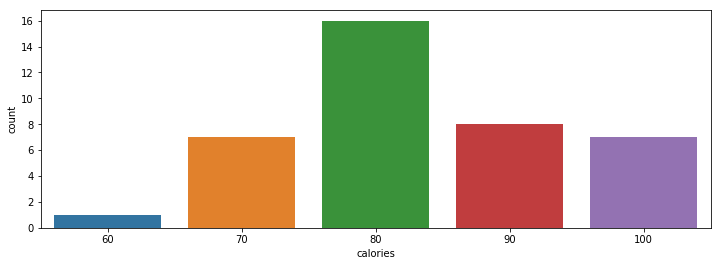

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(x='calories', data=data)#.set_title("Average User Rating")

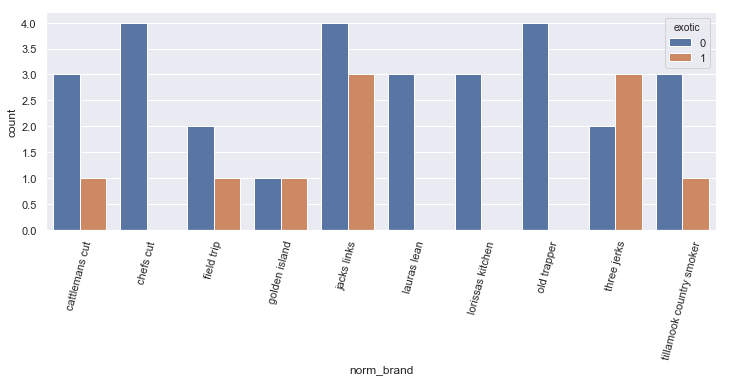

In [19]:
#plt.figure(figsize=(12,4))
#sns.countplot(x='brand', hue='smoked', data=data).set_title("Calories per Serving x Protein");

fig = sns.set(rc = {'figure.figsize':(12,4)})
bp = sns.countplot(x = "norm_brand", hue = "exotic", data = data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 75)
plt.show()

In [45]:
data["protein_group"] = pd.cut(data['protein'], 3, labels=["9-10", "11-12", "13+"])

In [62]:
data['norm_brand'] = [brand.lower() for brand in data['brand']]
data['norm_flav'] = [flavor.lower() for flavor in data['flavor']]
data['norm_desc'] = [manufactureDescription.lower() for manufactureDescription in data['manufactureDescription']]

In [63]:
data.head()

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,...,dry,thick,thin,grade,cost,jerkyID.1,protein_group,norm_brand,norm_flav,norm_desc
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,...,1,1,0,NaN,NaN,1,9-10,cattlemans cut,original,featuring only premium steak with a robust fla...
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,...,1,1,0,NaN,NaN,2,9-10,cattlemans cut,peppered,"when you start with slow-cooked premium steak,..."
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,...,0,0,0,NaN,NaN,3,9-10,cattlemans cut,teriyaki,by drenching our premium steak in a mixture of...
3,4,4,FLANK STEAK JERKY There’s truly nothing on ear...,Cattlemans Cut,Texas Style,0,10,100,0,1,...,0,0,1,NaN,NaN,4,9-10,cattlemans cut,texas style,flank steak jerky there’s truly nothing on ear...
4,5,5,REAL STEAK JERKY ORIGINAL RECIPE Some steaks c...,Chefs Cut,Original,0,10,90,1,0,...,0,1,0,NaN,NaN,5,9-10,chefs cut,original,real steak jerky original recipe some steaks c...


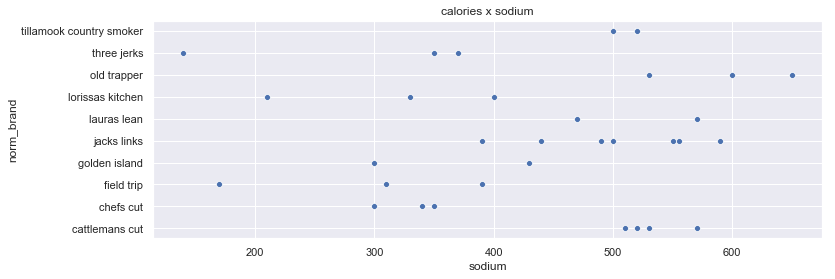

In [51]:
sns.scatterplot(x='sodium'
                #, y='calories'
                , y = 'norm_brand'
                , data=data
               ).set_title('calories x sodium');

In [149]:
brands = jerky_df[['norm_brand', 'sodium', 'calories', 'protein']]
brands.head()
print("Sodium Per Serving Mean: " + str(jerky_df['sodium'].mean()))
print("Calories Per Serving Mean: " + str(jerky_df['calories'].mean()))
print("Protein Per Serving Mean: " + str(jerky_df['protein'].mean()))

Sodium Per Serving Mean: 438.3333333333333
Calories Per Serving Mean: 83.33333333333333
Protein Per Serving Mean: 10.538461538461538


In [112]:
brandsg = brands.groupby('norm_brand').mean().sort_values(by = 'sodium', ascending=False)

In [142]:
brand_flav = jerky_df[['norm_brand', 'norm_flav', 'sodium', 'calories', 'protein']]

brand_calg = brand_flav.groupby(['norm_brand', 'norm_flav']).mean().sort_values(by = 'calories', ascending=False)
brand_calg.head()

sodium  calories  protein
norm_brand    norm_flav                                                
golden island chili lime spicy and tangy         430       100       12
three jerks   maple bourbon sweet and boozy      370       100       12
              original                           370       100       12
              teriyaki gingery and garlicky      350       100       10
              chipotle adobo sweet and tangy     350       100       10

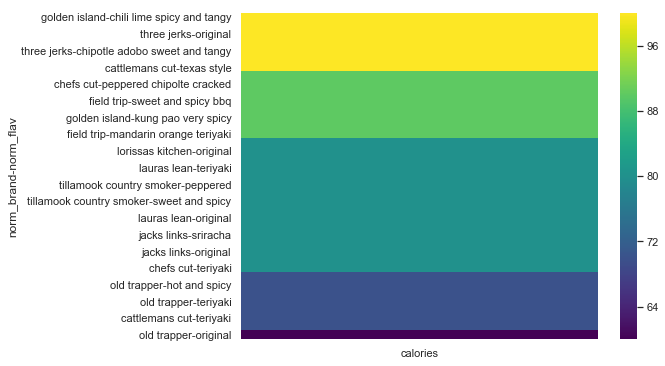

In [143]:
plt.figure(figsize=(8,6))
sns.heatmap(brand_calg[['calories']],cbar=True, cmap='viridis');

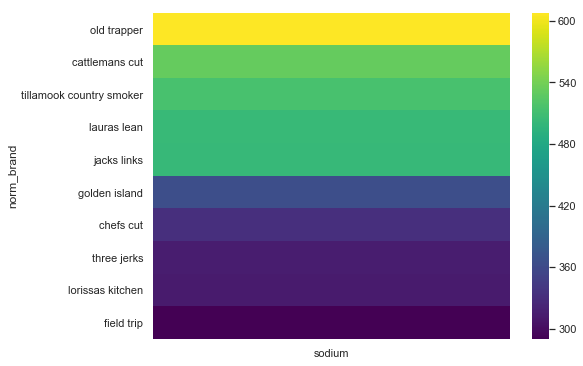

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(brandsg[['sodium']],cbar=True, cmap='viridis');

In [116]:
flavs = jerky_df[['norm_flav', 'sodium', 'calories', 'protein']]
flavs.head()

,norm_flav,sodium,calories,protein
0,original,570,70,10
1,peppered,520,70,10
2,teriyaki,530,70,10
3,texas style,510,100,10
4,original,340,90,10


In [120]:
flavsg = flavs[['norm_flav','sodium', 'calories', 'protein']].groupby('norm_flav').mean().sort_values(by = 'sodium', ascending = False)

In [121]:
flavsg

,sodium,calories,protein
norm_flav,,,
hot and spicy,650.0,70.00,9.000
peppered,542.0,76.00,10.000
original old fashioned,520.0,80.00,10.000
honey glazed,520.0,90.00,10.000
texas style,510.0,100.00,10.000
teriyaki,507.0,76.00,10.200
sriracha,500.0,80.00,12.000
hickory smoked,490.0,80.00,11.000
original,457.5,81.25,10.375


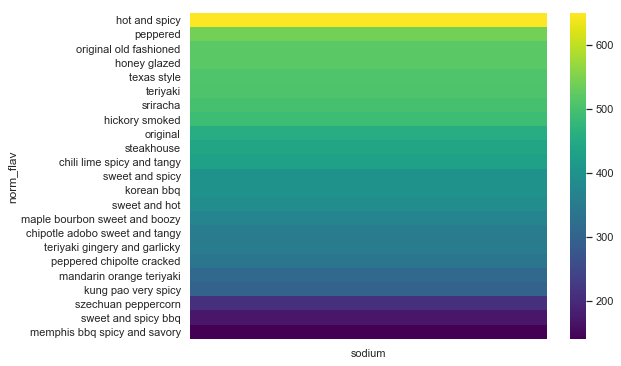

In [122]:
plt.figure(figsize=(8,6))
sns.heatmap(flavsg[['sodium']],cbar=True, cmap='viridis');

NameError: name 'norm_flav' is not defined

In [151]:
jerky_df.head()

,descriptionID,jerkyID,manufactureDescription,brand,flavor,smoked,protein,calories,gluten free,exotic,...,moist,dry,thick,thin,grade,cost,jerkyID.1,norm_brand,norm_flav,norm_desc
0,1,1,Featuring only premium steak with a robust fla...,Cattlemans Cut,Original,0,10,70,0,0,...,0,1,1,0,NaN,NaN,1,cattlemans cut,original,featuring only premium steak with a robust fla...
1,2,2,"When you start with slow-cooked premium steak,...",Cattlemans Cut,peppered,0,10,70,0,0,...,0,1,1,0,NaN,NaN,2,cattlemans cut,peppered,"when you start with slow-cooked premium steak,..."
2,3,3,By drenching our premium steak in a mixture of...,Cattlemans Cut,Teriyaki,0,10,70,0,0,...,0,0,0,0,NaN,NaN,3,cattlemans cut,teriyaki,by drenching our premium steak in a mixture of...
3,4,4,FLANK STEAK JERKY There’s truly nothing on ear...,Cattlemans Cut,Texas Style,0,10,100,0,1,...,0,0,0,1,NaN,NaN,4,cattlemans cut,texas style,flank steak jerky there’s truly nothing on ear...
4,5,5,REAL STEAK JERKY ORIGINAL RECIPE Some steaks c...,Chefs Cut,Original,0,10,90,1,0,...,1,0,1,0,NaN,NaN,5,chefs cut,original,real steak jerky original recipe some steaks c...


In [154]:
clean_desc = []
for w in range(len(jerky_df.norm_desc)):
    
    
    #Remove punctuations
    desc = re.sub('[^a-zA-Z]', ' ', jerky_df['norm_desc'][w])
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    # remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
    
jerky_df['clean_desc'] = clean_desc

In [155]:
word_frequency = pd.Series(' '.join(jerky_df['clean_desc']).split()).value_counts()[:20]
word_frequency

jerky     70
the       67
and       58
beef      55
of        46
a         44
with      43
you       39
our       33
to        31
sweet     31
in        28
is        27
we        25
it        20
s         20
steak     20
i         19
flavor    18
real      17
dtype: int64

In [162]:
stop_words = set(STOPWORDS) 

add_stopwords = ["beef", "jerky", "flavor"]
stop_words = stop_words.union(add_stopwords)

split = []
for w in range(len(jerky_df['clean_desc'])):

    split_text = jerky_df['clean_desc'][w].split()
    split_text = [word for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    split.append(split_text)


['featuring premium steak robust s rooted sweet savory seasoning brown sugar layers hardwood smoke cattleman s cut original slow cooked deliver big bold taste every bite',
 'start slow cooked premium steak brown sugar sweet savory seasoning layers hardwood smoke isn t much improve upon delicious fact thing think adding spicy fresh cracked black pepper',
 'drenching premium steak mixture soy sauce garlic brown sugar savory seasonings slow cooking hours ve created timeless smoky sweet teriyaki will leave craving',
 'flank steak s truly nothing earth thick cuts tender flank steak strips premium meat perfectly marinated garlic pepper brown sugar provide sweet rich start peppery kick make mistake though delicious ll remember',
 'real steak original recipe steaks come plate comes bag premium cuts hand picked marinated chef s soy sauce horseradish worcestershire sauce unique blend combined proprietary smoking process gives original recipe real steak perfect proportion salty spicy sweet',
 're

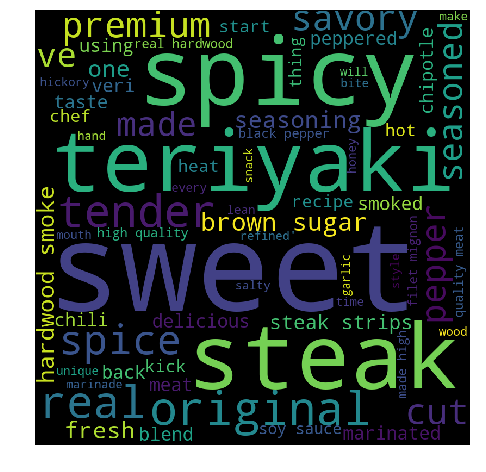

In [163]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black',
                          stopwords = stop_words,
                          max_words = 1000,
                          min_font_size = 20 
                          ).generate(str(split))
#print(wordcloud)
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("wordcloud.png")